# Vpogled v nepremičnine: Analiza slovenskega nepremičninskega trga

Ta projekt si prizadeva zagotoviti poglobljeno analizo slovenskega nepremičninskega trga, s poudarkom na prodaji in dolgoročnem najemu. Podatki za to analizo so bili pridobljeni s spletnega mesta https://www.nepremicnine.net/, ki zajema širok spekter nepremičninskih oglasov.

Z uporabo knjižnice Pandas v programskem jeziku Python znotraj okolja Jupyter Notebook bo projekt raziskal ključne tržne trende, cenovne vzorce in geografsko razporeditev nepremičnin. S pomočjo vizualizacije teh podatkov in izvedbe statističnih analiz bo projekt poskušal ponuditi dragocene vpoglede v dinamiko slovenskega nepremičninskega trga, kar bi lahko pomagalo kupcem, najemnikom in vlagateljem pri sprejemanju premišljenih odločitev.

# Skripta
1. [Pregled trga](#Pregled-trga)
   - [Razporeditev oglasov po tipih (prodaja/oddaja)](#Razporeditev-oglasov-po-tipih-(prodaja/oddaja))
   - [Razporeditev oglasov po tipu nepremičnine (hiša/stanovanje)](#Razporeditev-oglasov-po-tipu-nepremičnine-(hiša/stanovanje))
   - [Geografska razporeditev](#Geografska-razporeditev)
3. [Analiza cen](#Analiza-cen)
   - [Razporeditev cen](#Razporeditev-cen)
     - [Razporeditev cen (prodaja)](#Razporeditev-cen-(prodaja))
     - [Razporeditev cen (oddaja)](#Razporeditev-cen-(oddaja))
   - [Povprečne in mediane cene](#Povprečne-in-mediane-cene)
     - [Povprečne in mediane cene (prodaja)](#Povprečne-in-mediane-cene-(prodaja))
     - [Povprečne in mediane cene (oddaja)](#Povprečne-in-mediane-cene-(oddaja))
3. [Regionalne razlike v cenah](#Regionalne-razlike-v-cenah)
     

### Uvoz podatkov in prilagoditev

In [378]:
import pandas as pd

df = pd.read_csv('data/ads.csv', index_col='id')
sell_df = df[df['ad_type'] == 'prodaja']
rent_df = df[df['ad_type'] == 'oddaja']
pd.options.display.max_rows = 20

In [379]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 7444 entries, 6842736 to 6842630
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ad_type           7444 non-null   object 
 1   real_estate_type  7444 non-null   object 
 2   region            7444 non-null   object 
 3   city              7444 non-null   object 
 4   type              7444 non-null   object 
 5   living_area       7444 non-null   float64
 6   land_area         3586 non-null   float64
 7   floor             5649 non-null   object 
 8   building_year     7444 non-null   int64  
 9   price             7444 non-null   float64
 10  seller            7444 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 697.9+ KB


,ad_type,real_estate_type,region,city,type,living_area,land_area,floor,building_year,price,seller
id,,,,,,,,,,,
6842736,prodaja,stanovanje,juzna primorska,koper,"1,5-sobno",37.52,NaN,p,2024,235000.0,fesst nepremičnine d.o.o.
6716261,prodaja,stanovanje,juzna primorska,lucija,2-sobno,69.20,NaN,1/4,1987,298700.0,obala nepremičnine d.o.o.
6589386,prodaja,stanovanje,juzna primorska,piran,4-sobno,99.30,NaN,2/m,1831,370000.0,obala nepremičnine d.o.o.
6786199,prodaja,stanovanje,juzna primorska,piran,garsonjera,56.80,NaN,3/4,1900,248000.0,obala nepremičnine d.o.o.
6601965,prodaja,stanovanje,juzna primorska,portorož,apartma,202.70,321.0,/1,1905,1547000.0,"re/max ljubljana, nepremičninska družba d.o.o."
6828163,prodaja,stanovanje,juzna primorska,portorož,2-sobno,55.90,NaN,NaN,1978,263000.0,abc nepremičnine d.o.o.
6842342,prodaja,stanovanje,juzna primorska,portorož,3-sobno,81.00,NaN,NaN,1984,430000.0,abc nepremičnine d.o.o.
6783649,prodaja,stanovanje,juzna primorska,ankaran,"1,5-sobno",41.00,NaN,p/3,2018,270000.0,klaras d.o.o.
6836749,prodaja,stanovanje,juzna primorska,ankaran,2-sobno,51.50,NaN,3/3,1994,195000.0,"nepremičnine lunar, vlado grbac s.p."


***
# Pregled trga

Ta razdelek zagotavlja pregled trga nepremičnin z analizo razporeditve oglasov po tipu (prodaja ali oddaja), tipu nepremičnine (hiša ali stanovanje) in geografski lokaciji. Razumevanje teh razporeditev pomaga pri prepoznavanju ključnih tržnih trendov in relativne razpoložljivosti različnih vrst nepremičnin v različnih regijah.

## Razporeditev oglasov po tipih (prodaja/oddaja)

Najprej si oglejmo razmerje med oglasi za prodajo in oddajo. Podatke bomo vizualizirali, da bomo videli, kako je trg razdeljen med tema dvema kategorijama.

<Axes: title={'center': 'Razporeditev oglasov po tipih (prodaja/oddaja)'}>

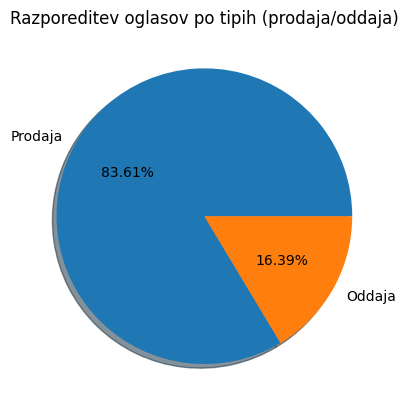

In [380]:
df['ad_type'].value_counts().plot.pie(
    title='Razporeditev oglasov po tipih (prodaja/oddaja)',
    labels=['Prodaja', 'Oddaja'],
    autopct='%.2f%%',
    shadow=True,        
    ylabel='',    
)

In [381]:
df['ad_type'].value_counts()

ad_type
prodaja    6224
oddaja     1220
Name: count, dtype: int64

## Razporeditev oglasov po tipu nepremičnine (hiša/stanovanje)

Zdaj si oglejmo razporeditev oglasov med hišami in stanovanji. Ta analiza nam bo pomagala razumeti relativno razpoložljivost različnih vrst nepremičnin na trgu in ali obstaja prednost enega tipa pred drugim.

<Axes: title={'center': 'Razporeditev oglasov po tipu nepremičnine (hiša/stanovanje)'}>

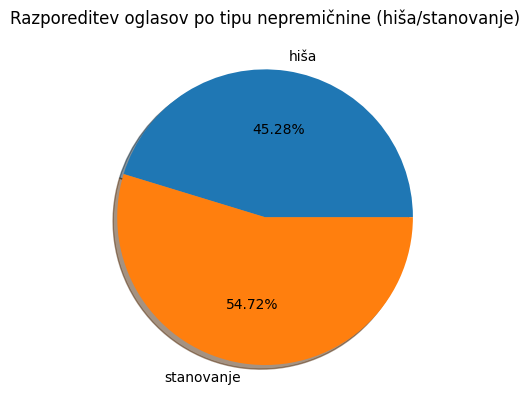

In [382]:
df.groupby('real_estate_type').size().plot.pie(
    title='Razporeditev oglasov po tipu nepremičnine (hiša/stanovanje)',
    autopct='%.2f%%',
    shadow=True,        
    ylabel='',    
)

In [383]:
df['real_estate_type'].value_counts()

real_estate_type
stanovanje    4073
hiša          3371
Name: count, dtype: int64

Oglejmo si tudi razporeditev oglasov po tipu oglasa (prodaja/oddaja) in tipu nepremičnine (hiša/stanovanje) hkrati.

<Axes: title={'center': 'Razporeditev oglasov po tipu oglasa (prodaja/oddaja) in tipu nepremičnine (hiša/stanovanje)'}>

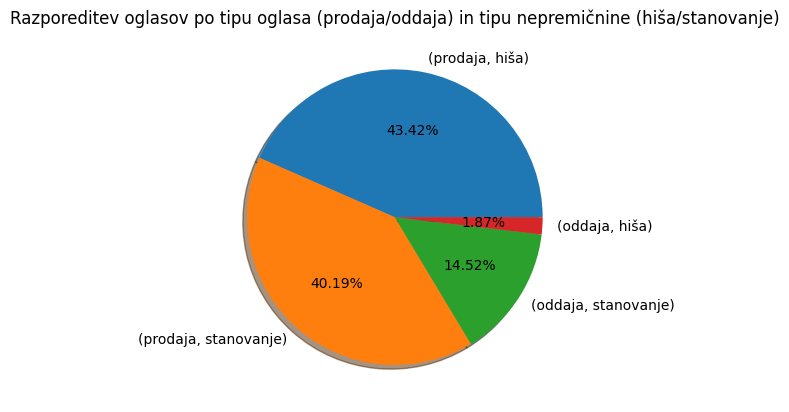

In [384]:
df[['ad_type', 'real_estate_type']].value_counts().plot.pie(
    title='Razporeditev oglasov po tipu oglasa (prodaja/oddaja) in tipu nepremičnine (hiša/stanovanje)',
    autopct='%.2f%%',
    shadow=True,        
    ylabel='',    
)

In [385]:
df[['ad_type', 'real_estate_type']].value_counts()

ad_type  real_estate_type
prodaja  hiša                3232
         stanovanje          2992
oddaja   stanovanje          1081
         hiša                 139
Name: count, dtype: int64

## Geografska razporeditev

Zdaj bomo prikazali razporeditev nepremičninskih oglasov po različnih regijah. Ta geografska analiza bo razkrila območja z visoko koncentracijo oglasov, kar lahko kaže na vroče točke trga ali razlike v razpoložljivosti nepremičnin.

<Axes: title={'center': 'Geografska razporeditev'}, ylabel='region'>

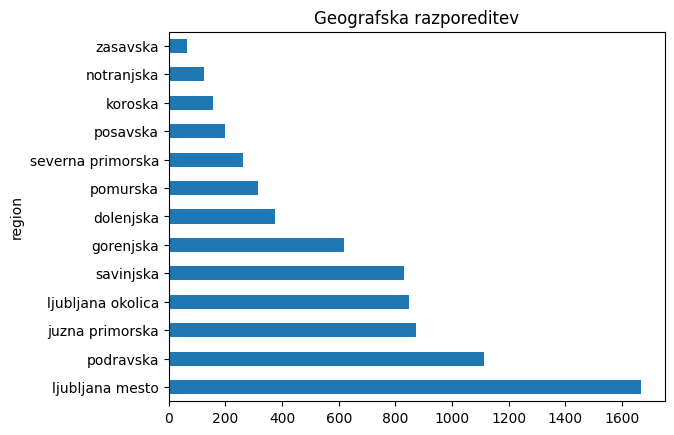

In [386]:
df['region'].value_counts().plot.barh(
    title="Geografska razporeditev"
)

In [387]:
df['region'].value_counts()

region
ljubljana mesto      1667
podravska            1112
juzna primorska       871
ljubljana okolica     847
savinjska             831
gorenjska             619
dolenjska             376
pomurska              314
severna primorska     263
posavska              200
koroska               157
notranjska            123
zasavska               64
Name: count, dtype: int64

## Sklep

Po kratkem pregledu trga lahko zaključimo, da na njem prevladujejo oglasi za prodajo nepremičnin. Pri tem je razdelitev med prodajo stanovanj in hiš enaka, medtem ko se veliko več stanovanj oddaja v najem.

Če pogledamo razporeditev po regijah, je vidno, da je največ ponudb v Ljubljani.

***
# Analiza cen

V tem razdelku bomo analizirali razporeditev in trende cen nepremičnin. To vključuje preučevanje splošne razporeditve cen, izračun povprečnih in medianih cen za različne tipe nepremičnin ter raziskovanje, kako se cene razlikujejo glede na regijo. Prav tako bomo raziskali razmerje med ceno in značilnostmi nepremičnin, kot so površina in število sob.

## Razporeditev cen

Najprej bomo preučili splošno razporeditev cen nepremičnin. To vključuje vizualizacijo razporeditve cen na trgu in razumevanje splošnega cenovnega razpona za prodajo in oddajo. Ta analiza zagotavlja osnovo za globlje vpoglede v cenovne trende.

### Razporeditev cen (prodaja)

Za začetek si oglejmo 5 najdražjih in 5 najcenejših ponudb.

In [388]:
sell_df.sort_values('price', ascending=False).head(5)

,ad_type,real_estate_type,region,city,type,living_area,land_area,floor,building_year,price,seller
id,,,,,,,,,,,
6826989,prodaja,hiša,ljubljana mesto,ljubljana,samostojna,474.88,870.0,p+1+2,2024,4161000.0,baza agencija d.o.o.
6827424,prodaja,hiša,gorenjska,kranjska gora,drugo,670.00,470.0,NaN,2020,3950000.0,dom real d.o.o.
6589216,prodaja,stanovanje,ljubljana mesto,ljubljana,5 in večsobno,390.30,NaN,6/7,2022,3932029.0,"ab nepremičnine, agencija za posredovanje v pr..."
6570641,prodaja,hiša,juzna primorska,malija,samostojna,1744.00,33103.0,k+p+1,2007,3900000.0,"aeon nepremičnine, d.o.o."
6824859,prodaja,hiša,severna primorska,kneža,drugo,760.00,28600.0,k+p+1+2/k+p+1+2,1988,3800000.0,zasebna ponudba


In [389]:
sell_df.sort_values('price', ascending=True).head(5)

,ad_type,real_estate_type,region,city,type,living_area,land_area,floor,building_year,price,seller
id,,,,,,,,,,,
6824369,prodaja,stanovanje,gorenjska,radovljica,3-sobno,12.50,NaN,NaN,2013,12500.0,mesto nepremičnin d.o.o.
6550925,prodaja,hiša,gorenjska,bohinjska bistrica,samostojna,13.66,44.05,NaN,1945,14500.0,"sdh, d.d."
6835049,prodaja,hiša,dolenjska,rajhenav,drugo,55.20,320.00,NaN,1958,15000.0,zavod za gozdove slovenije
6821318,prodaja,hiša,pomurska,čentiba,samostojna,76.00,2772.00,k+p+m,1990,19000.0,zasebna ponudba
6748385,prodaja,hiša,pomurska,lončarovci,samostojna,55.60,1663.00,NaN,1923,19000.0,"nepremičnine djm, posredništvo, mirjana kouter..."


Izračunajmo razliko med najdražjim in najcenejšim oglasom.

In [390]:
print(f'Razlika je {float(sell_df['price'].max() - sell_df['price'].min())} evrov.')

Razlika je 4148500.0 evrov.


Oglejmo si splošno razporeditev cen.

<Axes: title={'center': 'Razporeditev cen'}, ylabel='Frequency'>

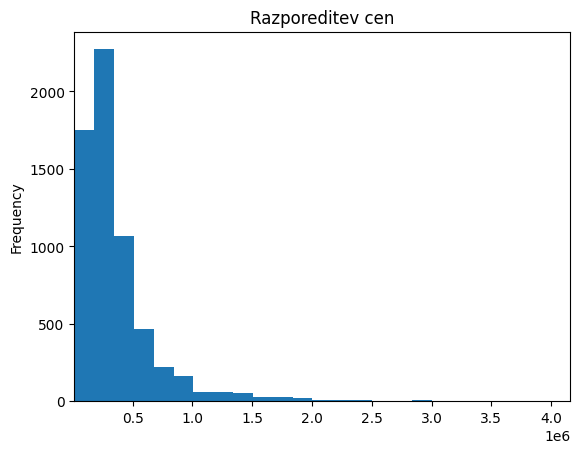

In [391]:
sell_df['price'].plot.hist(
    title='Razporeditev cen',
    bins=25, 
    xlim=[sell_df['price'].min(), sell_df['price'].max()]
)

Opazimo, da večina nepremičnin, ki so naprodaj, stane do 500.000 evrov. Za boljše razumevanje razporeditve cen bomo oglase razdelili v tri cenovne kategorije: od 0 do 500.000 evrov, od 500.000 do 1.000.000 evrov in od 1.000.000 evrov naprej.

<Axes: title={'center': 'Razporeditev cen. Oglasi od 0 do 500.000 evrov'}, ylabel='Frequency'>

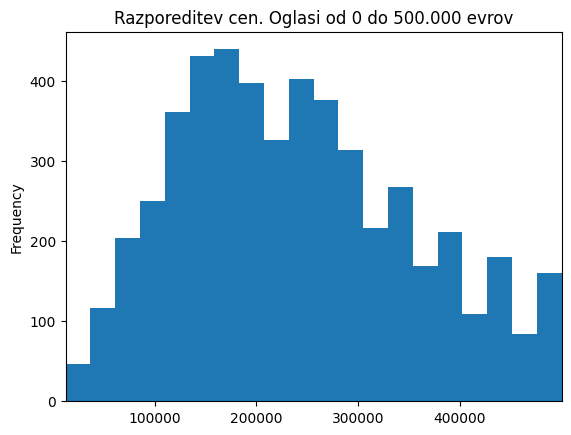

In [392]:
first_group = sell_df[sell_df['price'] < 500000]
first_group['price'].plot.hist(
    title='Razporeditev cen. Oglasi od 0 do 500.000 evrov',
    bins=20, 
    xlim=[first_group['price'].min(), first_group['price'].max()]
)

<Axes: title={'center': 'Razporeditev cen. Oglasi od 500.000 do 1.000.000 evrov'}, ylabel='Frequency'>

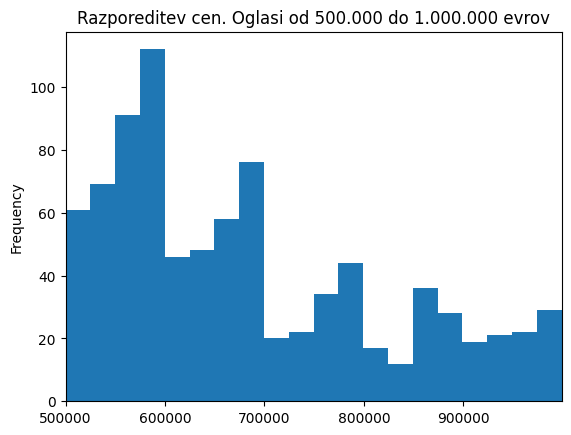

In [393]:
second_group = sell_df[(sell_df['price'] >= 500000) & (sell_df['price'] < 1000000)]
second_group['price'].plot.hist(
    title='Razporeditev cen. Oglasi od 500.000 do 1.000.000 evrov',
    bins=20, 
    xlim=[second_group['price'].min(), second_group['price'].max()]
)

<Axes: title={'center': 'Razporeditev cen. Oglasi od 1.000.000 evrov naprej'}, ylabel='Frequency'>

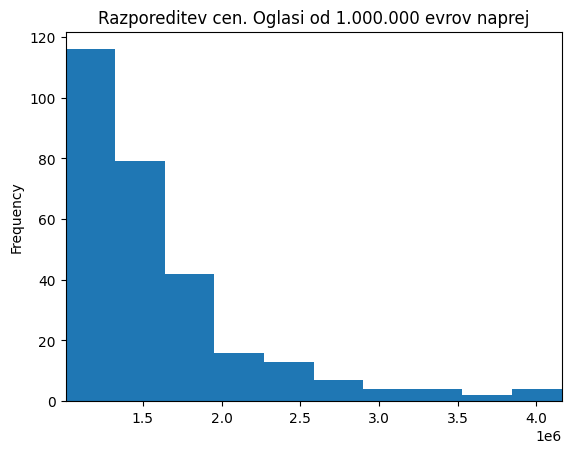

In [394]:
third_group = sell_df[sell_df['price'] > 1000000]
third_group['price'].plot.hist(
    title='Razporeditev cen. Oglasi od 1.000.000 evrov naprej',
    bins=10, 
    xlim=[third_group['price'].min(), third_group['price'].max()]
)

### Sklep

Ni težko opaziti, da število oglasov eksponentno pada z rastjo cene nepremičnine.

Če obravnavamo cenovne skupine posamezno, lahko v prvi skupini opazimo normalno porazdelitev, v drugi linearno padanje, v tretji pa eksponentno padanje ponudb z rastjo cene.

### Razporeditev cen (oddaja)

Spet si oglejmo 5 najdražjih in 5 najcenejših ponudb.

In [395]:
rent_df.sort_values('price', ascending=False).head(5)

,ad_type,real_estate_type,region,city,type,living_area,land_area,floor,building_year,price,seller
id,,,,,,,,,,,
6531465,oddaja,stanovanje,ljubljana mesto,ljubljana,4-sobno,150.00,NaN,NaN,2022,7700.0,"stoja trade, d.o.o., ljubljana"
6836618,oddaja,stanovanje,ljubljana mesto,ljubljana,4-sobno,200.00,NaN,NaN,2024,6000.0,zasebna ponudba
6790043,oddaja,hiša,ljubljana mesto,ljubljana,samostojna,473.00,770.0,NaN,2007,6000.0,"stoja trade, d.o.o., ljubljana"
6521290,oddaja,stanovanje,ljubljana mesto,ljubljana,3-sobno,150.00,NaN,NaN,2022,5500.0,"stoja trade, d.o.o., ljubljana"
6694221,oddaja,hiša,ljubljana mesto,ljubljana,samostojna,247.93,375.0,NaN,2023,4990.0,"stoja trade, d.o.o., ljubljana"


In [396]:
rent_df.sort_values('price', ascending=True).head(5)

,ad_type,real_estate_type,region,city,type,living_area,land_area,floor,building_year,price,seller
id,,,,,,,,,,,
6680231,oddaja,stanovanje,ljubljana mesto,ljubljana,soba,16.0,NaN,NaN,1980,80.0,zasebna ponudba
6754209,oddaja,hiša,ljubljana mesto,ljubljana,samostojna,450.0,800.0,p+1,2000,95.0,zasebna ponudba
6780970,oddaja,stanovanje,dolenjska,dolenja nemška vas,drugo,100.0,1500.0,p/p,2002,100.0,zasebna ponudba
6744326,oddaja,stanovanje,ljubljana mesto,ljubljana,soba,10.0,NaN,NaN,1977,120.0,zasebna ponudba
6689809,oddaja,stanovanje,posavska,sevnica,2-sobno,60.0,NaN,3/4,2005,120.0,zasebna ponudba


Izračunajmo razliko med najdražjim in najcenejšim oglasom.

In [397]:
print(f'Razlika je {float(rent_df['price'].max() - rent_df['price'].min())} evrov.')

Razlika je 7620.0 evrov.


Oglejmo si splošno razporeditev cen.

<Axes: title={'center': 'Razporeditev cen'}, ylabel='Frequency'>

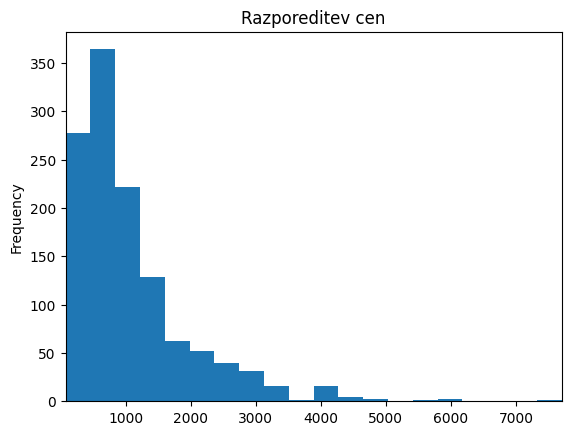

In [398]:
rent_df['price'].plot.hist(
    title='Razporeditev cen',
    bins=20, 
    xlim=[rent_df['price'].min(), rent_df['price'].max()]
)

Opazimo, da je večina oglasov za najem stanovanj v cenovnem razponu od 0 do 1000 evrov/mesec, zato bomo podrobneje pogledali razporeditev oglasov v tem cenovnem razponu.

<Axes: title={'center': 'Razporeditev cen. Oglasi od 0 do 1000 evrov'}, ylabel='Frequency'>

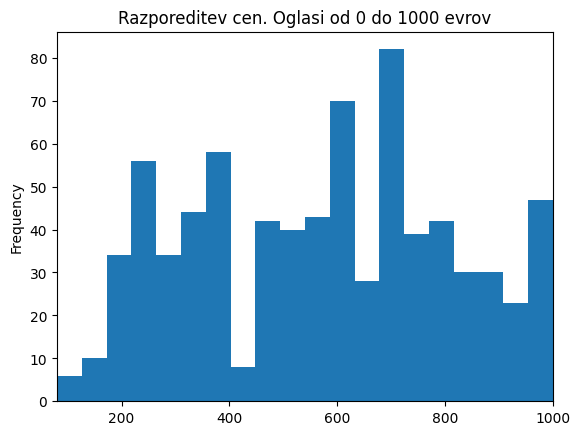

In [399]:
first_group = rent_df[rent_df['price'] <= 1000]
first_group['price'].plot.hist(
    title='Razporeditev cen. Oglasi od 0 do 1000 evrov',
    bins=20, 
    xlim=[first_group['price'].min(), first_group['price'].max()]
)

### Sklep

V razporeditvi cen za najem nepremičnin vidimo podobno sliko kot pri cenah za prodajo. S povečanjem cene število ponudb eksponentno pada. V skupini oglasov s ceno od 200 do 1000 evrov opazimo približno enakomerno razporeditev.

##  Povprečne in mediane cene

V tem podrazdelku bomo izračunali in primerjali povprečne in mediane cene nepremičnin. Analiza bo segmentirana po tipu nepremičnine (hiše, stanovanja) in tipu oglasa (prodaja, najem), da bi izpostavili morebitne razlike. Razumevanje teh mer centralne tendence pomaga oceniti tipične tržne cene.

### Povprečne in mediane cene (prodaja)

Izračunajmo povprečne in mediane vrednosti cene prodaje hiš in stanovanj.

In [400]:
sell_df.groupby('real_estate_type')['price'].agg(['mean', 'median'])

,mean,median
real_estate_type,,
hiša,427404.919205,299000.0
stanovanje,298716.229342,244505.5


Ločeno si bomo ogledali povprečne in mediane cene samostojnih hiš ter 2-3 sobnih stanovanj, saj so po skromnem mnenju avtorja to najbolj zaželeni tipi nepremičnin.

**Samostojne hiše:**

In [405]:
single_homes = sell_df[(sell_df['real_estate_type'] == 'hiša') & (sell_df['type'] == 'samostojna')]
single_homes['price'].agg(['mean', 'median'])

mean      427708.903907
median    285500.000000
Name: price, dtype: float64

**2-sobni stanovanja:**

In [417]:
two_room_apartments = sell_df[(sell_df['real_estate_type'] == 'stanovanje') & ((sell_df['type'] == '2-sobno') | (sell_df['type'] == '2,5-sobno'))]
two_room_apartments['price'].agg(['mean', 'median'])

mean      202201.679654
median    180000.000000
Name: price, dtype: float64

**3-sobni stanovanja:**

In [420]:
three_room_apartments = sell_df[(sell_df['real_estate_type'] == 'stanovanje') & ((sell_df['type'] == '3-sobno') | (sell_df['type'] == '3,5-sobno'))]
three_room_apartments['price'].agg(['mean', 'median'])

mean      302934.814282
median    264900.000000
Name: price, dtype: float64

### Povprečne in mediane cene (oddaja)

Izračunajmo povprečne in mediane vrednosti cene najema hiš in stanovanj.

In [401]:
rent_df.groupby('real_estate_type')['price'].agg(['mean', 'median'])

,mean,median
real_estate_type,,
hiša,1898.618705,1800.0
stanovanje,979.948566,750.0


V tem razdelku bomo posebej pregledali povprečne in mediane cene najema sob, garsonjer in enosobnih stanovanj, saj so te vrste nepremičnin najbolj primerne za študente.

**Sobe:**

In [428]:
rooms = rent_df[(rent_df['real_estate_type'] == 'stanovanje') & (rent_df['type'] == 'soba')]
rooms['price'].agg(['mean', 'median'])

mean      261.875
median    250.000
Name: price, dtype: float64

**Garsonjere:**

In [430]:
studios = rent_df[(rent_df['real_estate_type'] == 'stanovanje') & (rent_df['type'] == 'garsonjera')]
studios['price'].agg(['mean', 'median'])

mean      548.41958
median    560.00000
Name: price, dtype: float64

**1-sobni stanovanja:**

In [434]:
one_room_apartments = rent_df[(rent_df['real_estate_type'] == 'stanovanje') & (rent_df['type'] == '1-sobno')]
one_room_apartments['price'].agg(['mean', 'median'])

mean      600.758929
median    600.000000
Name: price, dtype: float64

## Regionalne razlike v cenah